# Statsmodels buat ngecek regresi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',False)
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

Jangan lupa kondisi yg harus terpenuhi buat regresi = no multicolinearity.

i think we should learn more about feature selection! remember, Garbage In Garbage Out

In [2]:
df = pd.read_csv('data_bersih_ver3.csv')
df = df[df['tipe']=='Rumah']
df = df.drop(['Unnamed: 0','tipe'], axis = 1)
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12765 entries, 0 to 13495
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    12765 non-null  int64  
 1   kamar_tidur    12765 non-null  int64  
 2   luas_bangunan  12765 non-null  float64
 3   luas_tanah     12765 non-null  float64
 4   harga          12765 non-null  float64
 5   kecamatan      12765 non-null  object 
 6   garasi         12765 non-null  bool   
 7   kolam_renang   12765 non-null  bool   
 8   taman          12765 non-null  bool   
 9   gym            12765 non-null  bool   
 10  listrik        12765 non-null  float64
 11  jumlah_lantai  12765 non-null  int64  
dtypes: bool(4), float64(4), int64(3), object(1)
memory usage: 947.4+ KB


In [3]:
num = [i for i in df.columns if df[i].dtypes in ['int64', 'float']]
cat = [i for i in df.columns if df[i].dtypes in ['O', 'bool']]

In [4]:
df[cat] = df[cat].astype('O')

In [5]:
from feature_engine.encoding import DecisionTreeEncoder as DTE

In [6]:
#np.bool ga ada?
encode = DTE(variables = ['kecamatan'])
encode.fit(df,df['harga'])

DecisionTreeEncoder(param_grid={'max_depth': [1, 2, 3, 4]},
                    variables=['kecamatan'])

In [7]:
from feature_engine.encoding import OrdinalEncoder as OE

In [8]:
oe = OE(variables = [i for i in cat if i != 'kecamatan'])
oe.fit(df,df['harga'])

OrdinalEncoder(variables=['garasi', 'kolam_renang', 'taman', 'gym'])

In [9]:
x = oe.transform(encode.transform(df))

In [10]:
from sklearn.preprocessing import StandardScaler as ss

In [11]:
x_scale = ss()
x_scale.fit(x.drop('harga',axis = 1))
y_scale = ss()
y_scale.fit(x[['harga']])

StandardScaler()

In [12]:
import statsmodels.api as sm

In [13]:
x = x_scale.transform(x.drop(['harga'],axis = 1))
y = y_scale.transform(df[['harga']])
x = pd.DataFrame(x)
y = pd.DataFrame(y)
x.columns = df.drop('harga', axis = 1).columns
y.columns = ['harga']
initial_data = pd.concat([x,y],axis = 1)
x = sm.add_constant(x)

In [14]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  harga   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     2439.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        12:32:23   Log-Likelihood:                -10884.
No. Observations:               12765   AIC:                         2.179e+04
Df Residuals:                   12753   BIC:                         2.188e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.581e-17      0.005  -1.51e-14      1.000      -0.010       0.010
kamar_mandi       0.0022      0.008      0.285      0.776      -0.013       0.018
kamar_tidur      -0.0275      0.007     -3.791      0.000      -0.042      -0.013
luas_bangunan     0.3674      0.008     44.503      0.000       0.351       0.384
luas_tanah        0.2521      0.008     33.530      0.000       0.237       0.267
kecamatan         0.4027      0.006     73.139      0.000       0.392       0.413
garasi           -0.0088      0.005     -1.690      0.091      -0.019       0.001
kolam_renang      0.0113      0.005      2.069      0.039       0.001       0.022
taman             0.0037      0.005      0.726      0.468      -0.006       0.014
gym               0.0135      0.005      2.647      0.008       0.004       0.024
listrik           0.0362      0.005      6.964      0.000       0.026       0.046
jumlah_lantai    -0.0260      0.005     -4.858      0.000      -0.036      -0.015
==============================================================================
Omnibus:                    16146.777   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         24907967.177
Skew:                           6.102   Prob(JB):                         0.00
Kurtosis:                     219.059   Cond. No.                         3.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Banyak feture yg ga terlalu berpengaruh

In [15]:
pd.DataFrame(model.params).reset_index().sort_values(by = 0, ascending = False)

,index,0
5,kecamatan,4.026582e-01
3,luas_bangunan,3.673704e-01
4,luas_tanah,2.521028e-01
10,listrik,3.619182e-02
9,gym,1.354253e-02
7,kolam_renang,1.134665e-02
8,taman,3.695286e-03
1,kamar_mandi,2.243793e-03
0,const,-7.580772e-17
6,garasi,-8.821214e-03


In [16]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [17]:
y_pred = model.predict(x)
sqrt(mse(y_pred, y))

0.5676122402066404

In [18]:
from scipy import stats

In [19]:
for k in cat+num:
    if df[k].nunique() <100:
        print("="*45,f' {k} ',"="*45)
        var = [i for i in df[k].unique()]
        pair = {}
        udah = []
        for i in var:
            for j in var:
                if (j not in udah) & (i != j):
                    ttest = stats.ttest_ind(a = df[df[k] == i]['harga'],
                                            b = df[df[k] == j]['harga'])
                    p_value = ttest.pvalue
                    pair[f'{i} - {j}'] = p_value
            udah.append(i)
        count = 0
        for i,j in pair.items():
            if j >= 0.05:
                print(i)
                count += 1
        print(f'{k}: {count/len(pair)*100}')
        print("="*100,end = '\n')

=============================================  kecamatan  =============================================
Mampang Prapatan - Tanah Abang
Cilandak - Tebet
Cilandak - Pasar Minggu
Cilandak - Pancoran
Cilandak - Gambir
Kebayoran Baru - Kebayoran Lama
Kebayoran Baru - Setiabudi
Jagakarsa - Koja
Jagakarsa - Cakung
Jagakarsa - Kramat Jati
Jagakarsa - Makasar
Jagakarsa - Matraman
Jagakarsa - Johar Baru
Jagakarsa - Kalideres
Tebet - Pasar Minggu
Tebet - Jatinegara
Tebet - Gambir
Tebet - Senen
Tebet - Palmerah
Pasar Minggu - Pancoran
Pasar Minggu - Jatinegara
Pasar Minggu - Gambir
Pasar Minggu - Palmerah
Kebayoran Lama - Setiabudi
Pesanggrahan - Tanjung Priok
Pesanggrahan - Kelapa Gading
Pesanggrahan - Pademangan
Pesanggrahan - Pulo Gadung
Pesanggrahan - Matraman
Pesanggrahan - Jatinegara
Pesanggrahan - Kemayoran
Pesanggrahan - Cempaka Putih
Pesanggrahan - Sawah Besar
Pesanggrahan - Johar Baru
Pesanggrahan - Senen
Pesanggrahan - Palmerah
Pesanggrahan - Kembangan
Pesanggrahan - Kebon Jeruk
Pesangg

# EDA

kamar_mandi


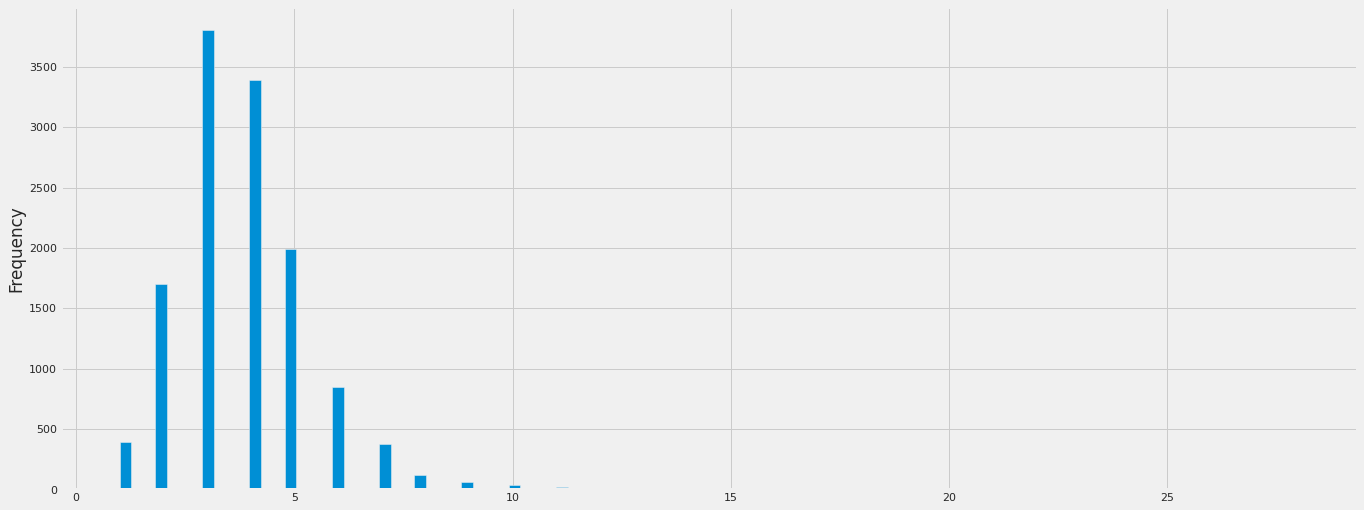

kamar_tidur


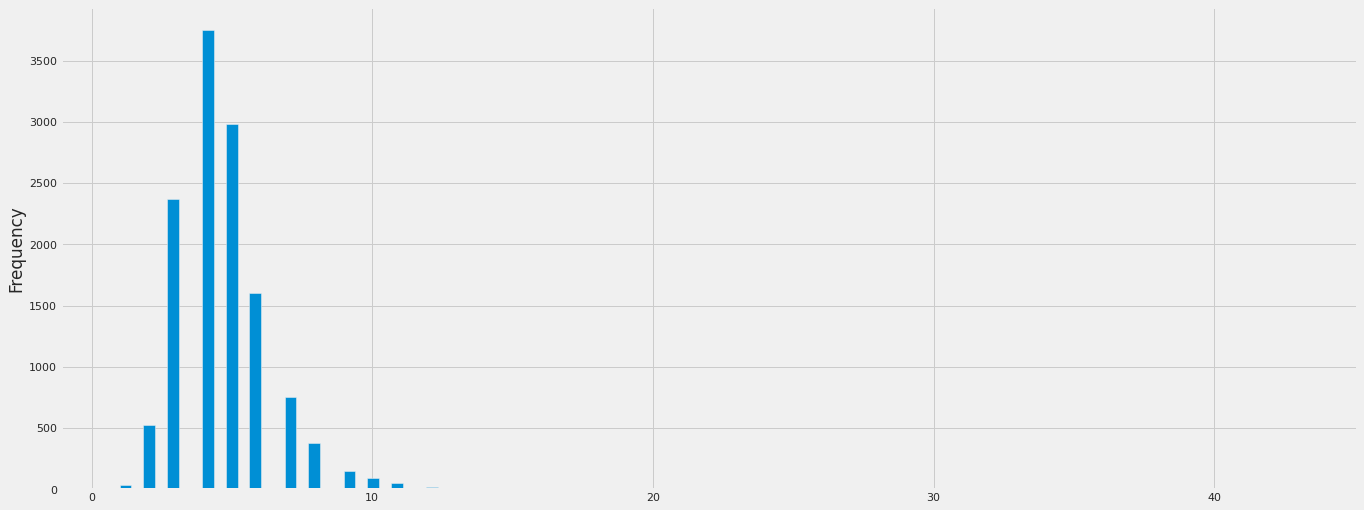

luas_bangunan


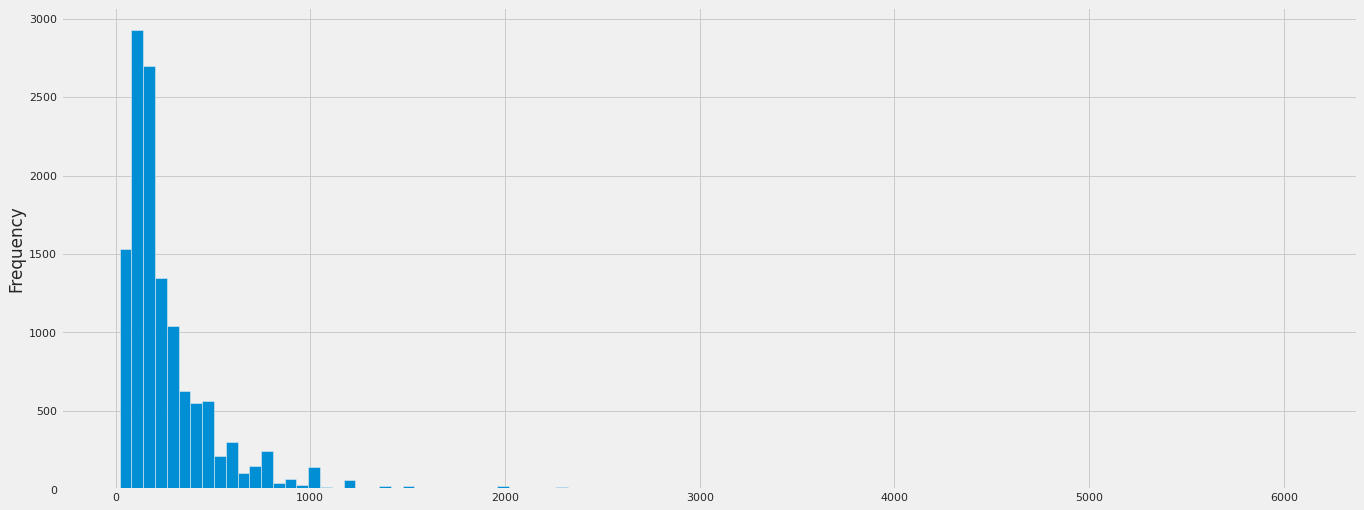

luas_tanah


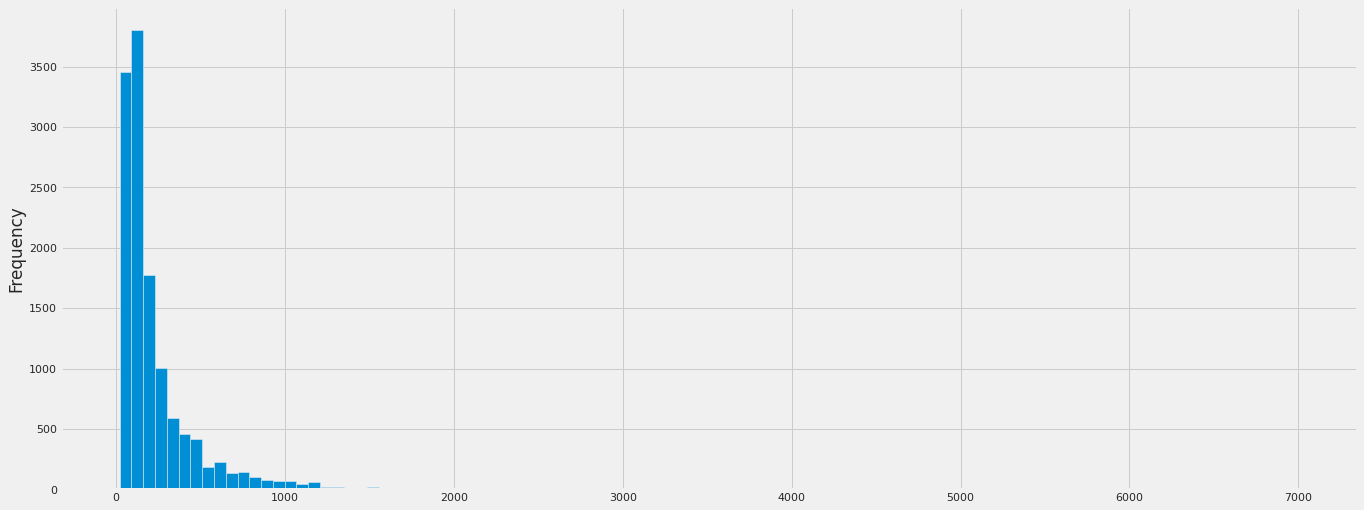

harga


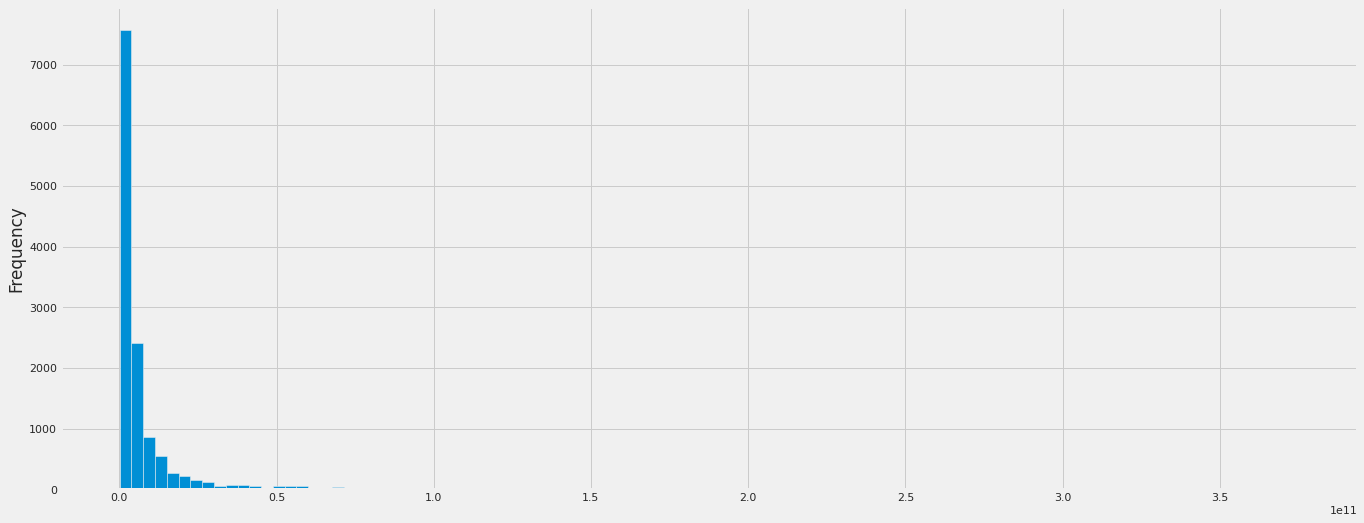

listrik


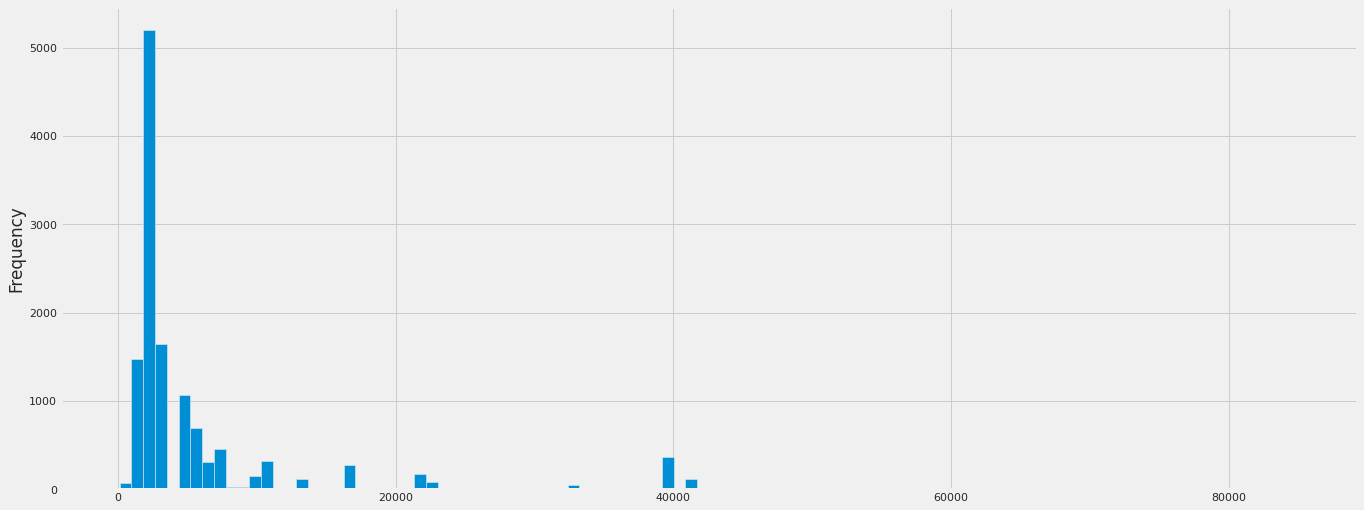

jumlah_lantai


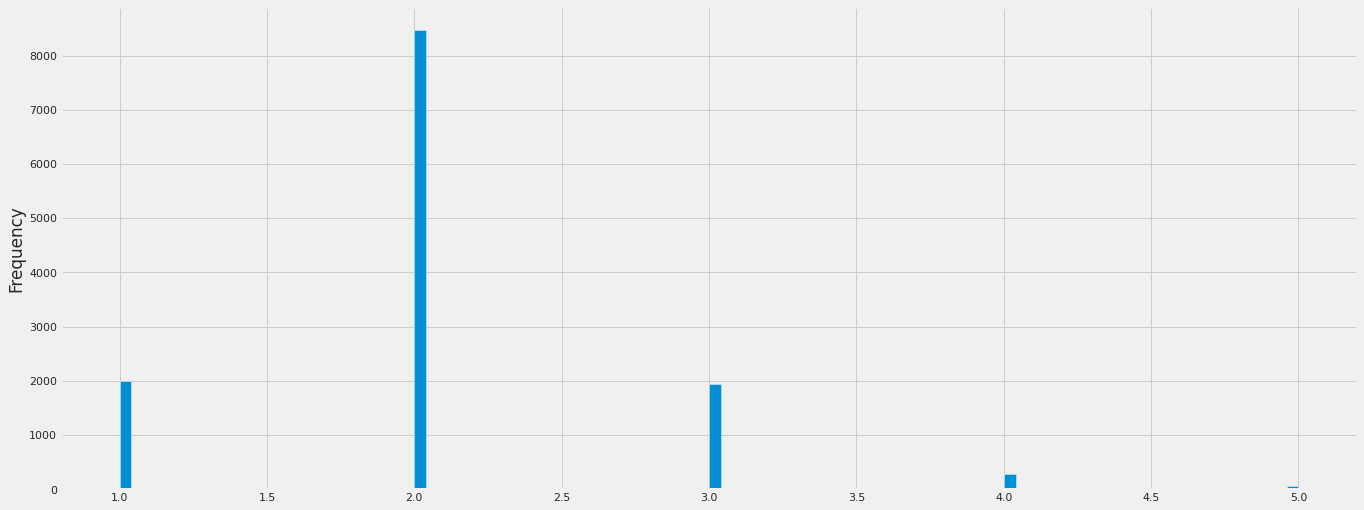

In [20]:
for i in num:
    print(i)
    df[i].plot.hist(bins = 100)
    plt.show()

kamar_mandi


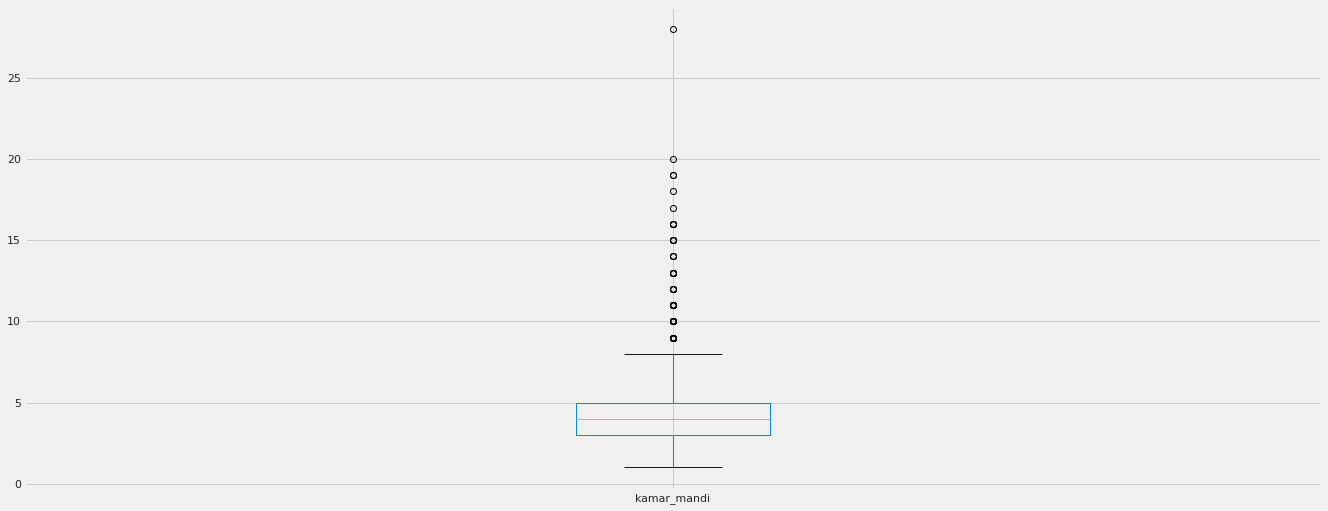

kamar_tidur


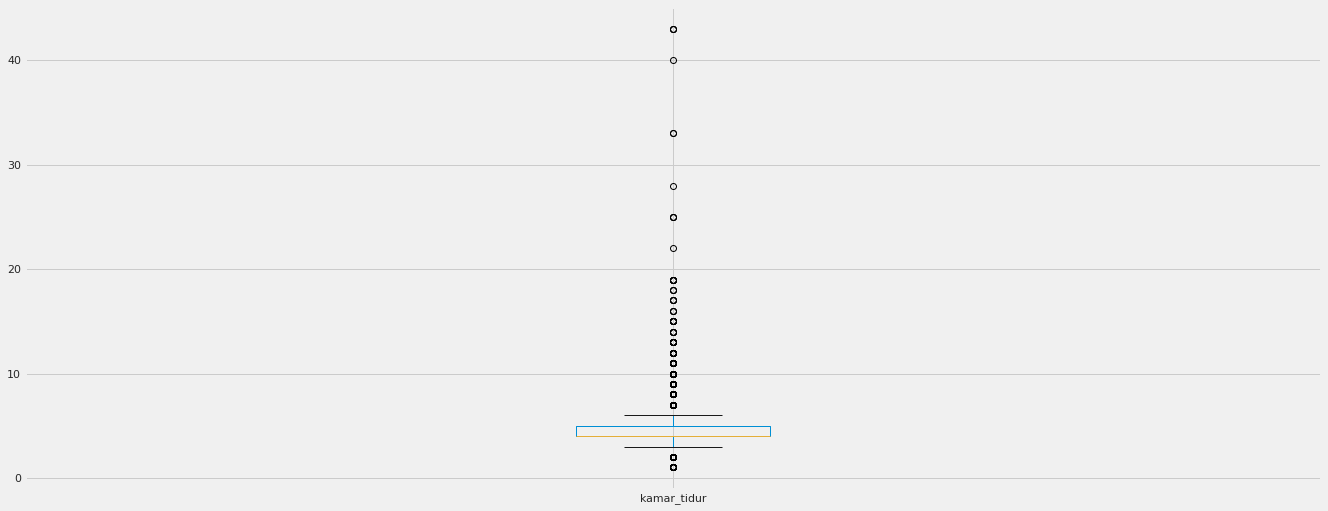

luas_bangunan


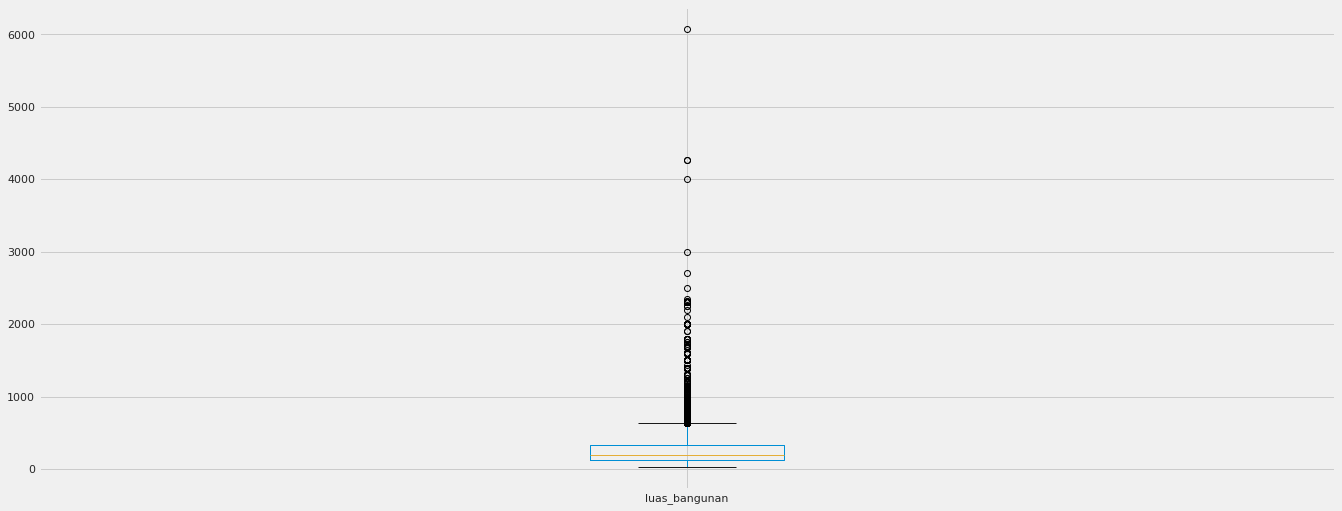

luas_tanah


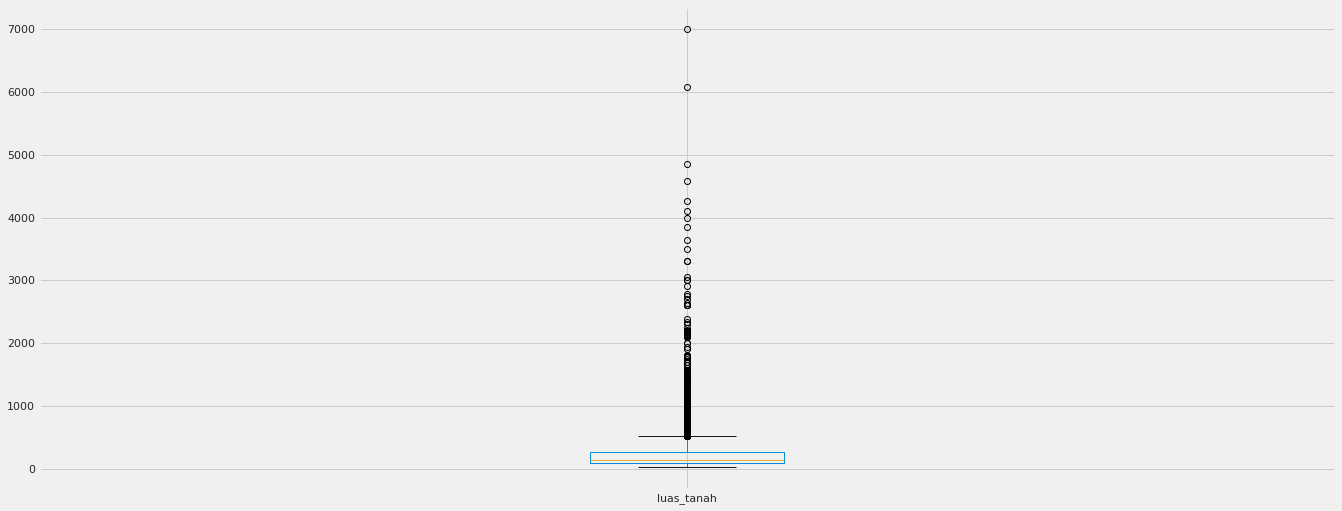

harga


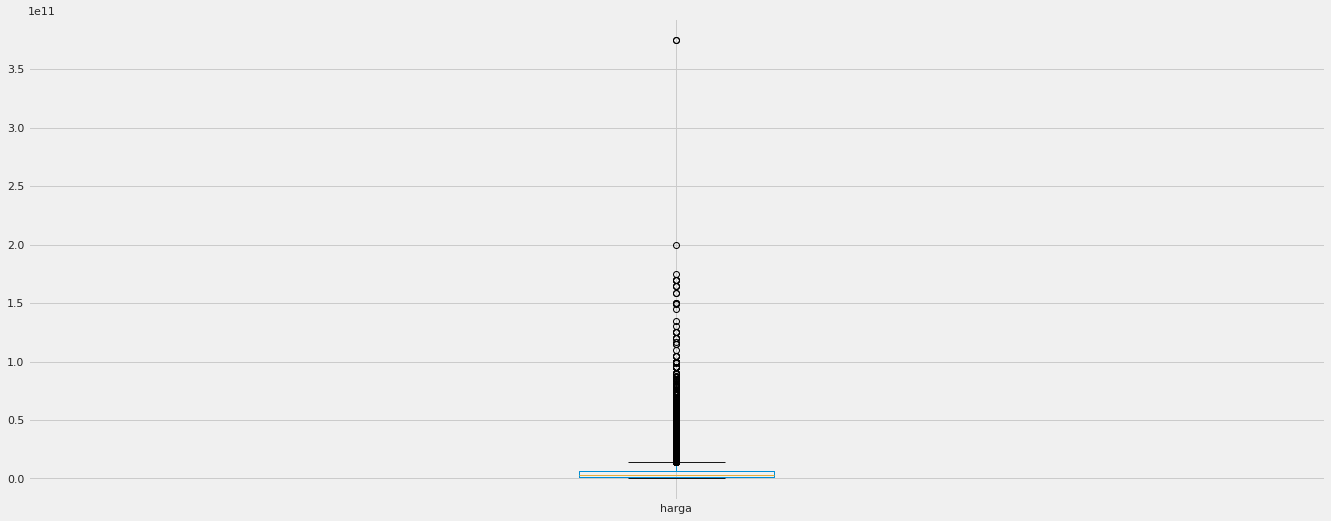

listrik


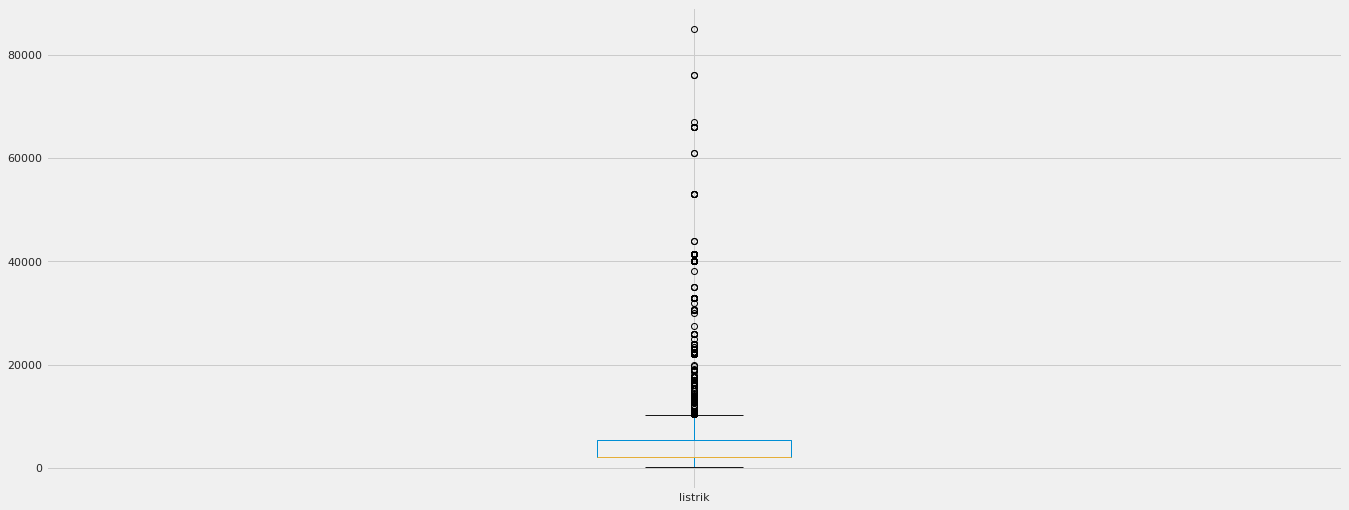

jumlah_lantai


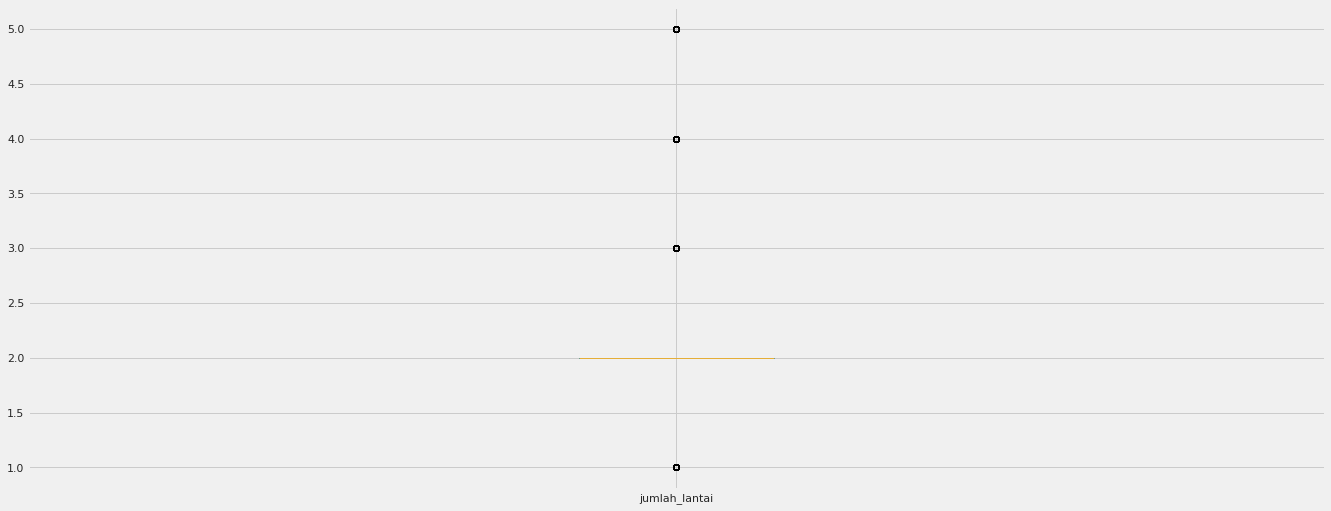

In [21]:
for i in num:
    print(i)
    df[i].plot.box()
    plt.show()

kecamatan


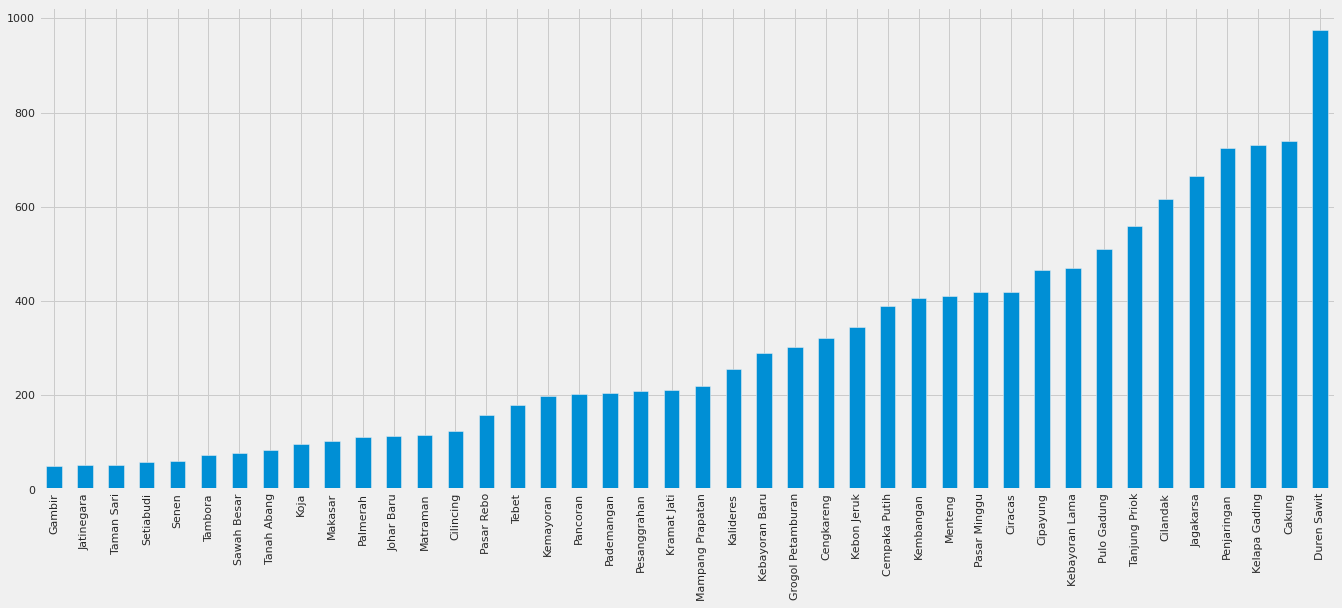

garasi


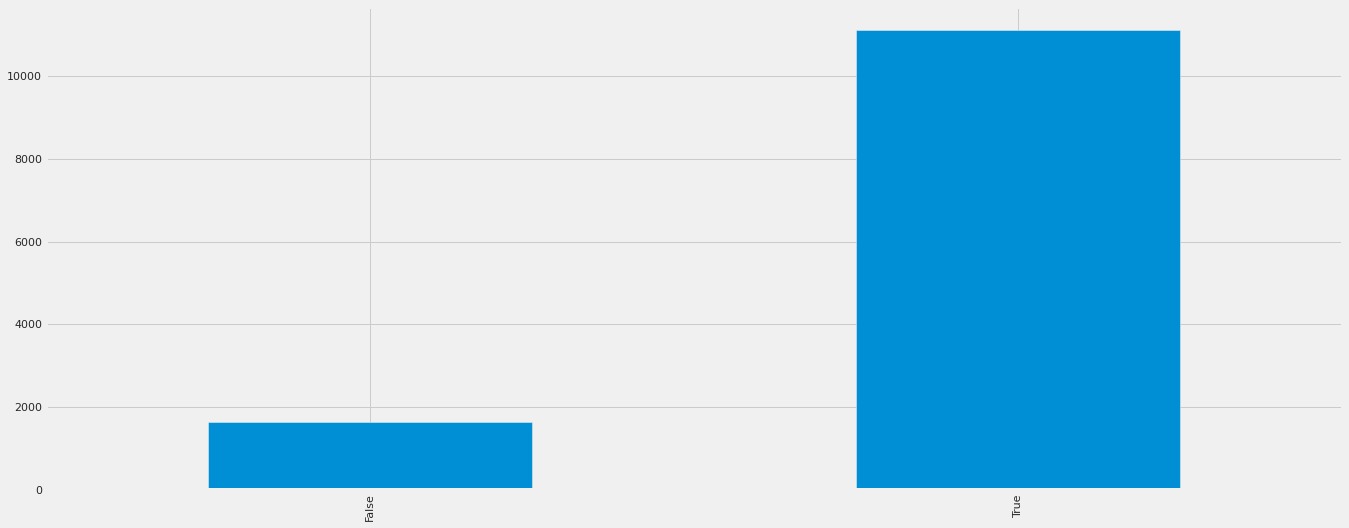

kolam_renang


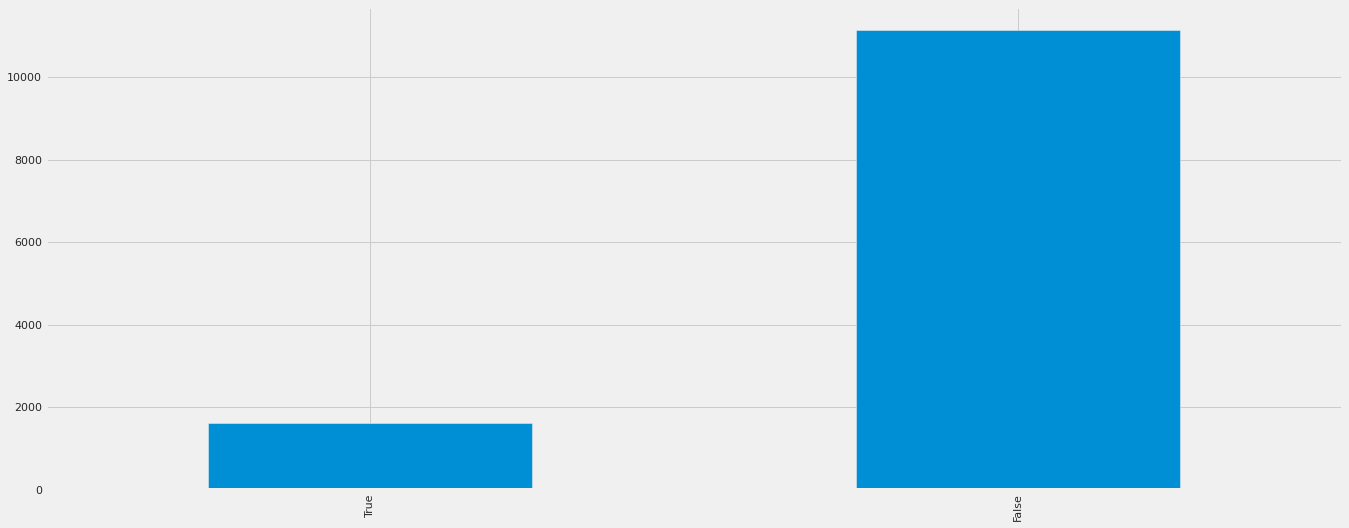

taman


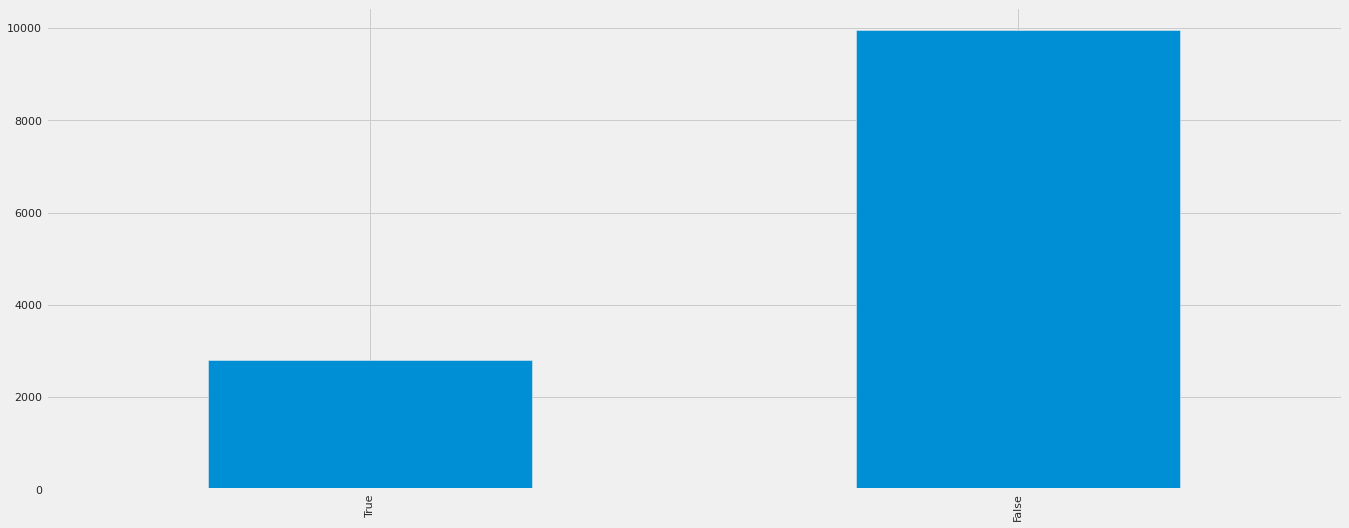

gym


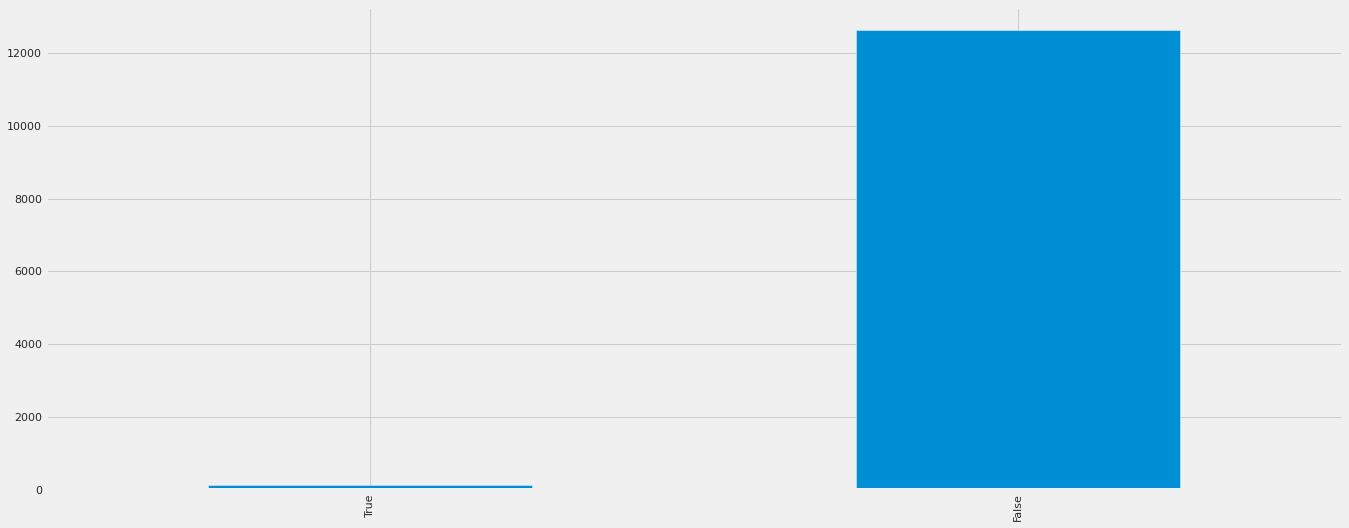

In [22]:
for i in cat:
    print(i)
    df[i].value_counts().sort_values().plot.bar()
    plt.show()

Masukin target (harga)

kamar_mandi


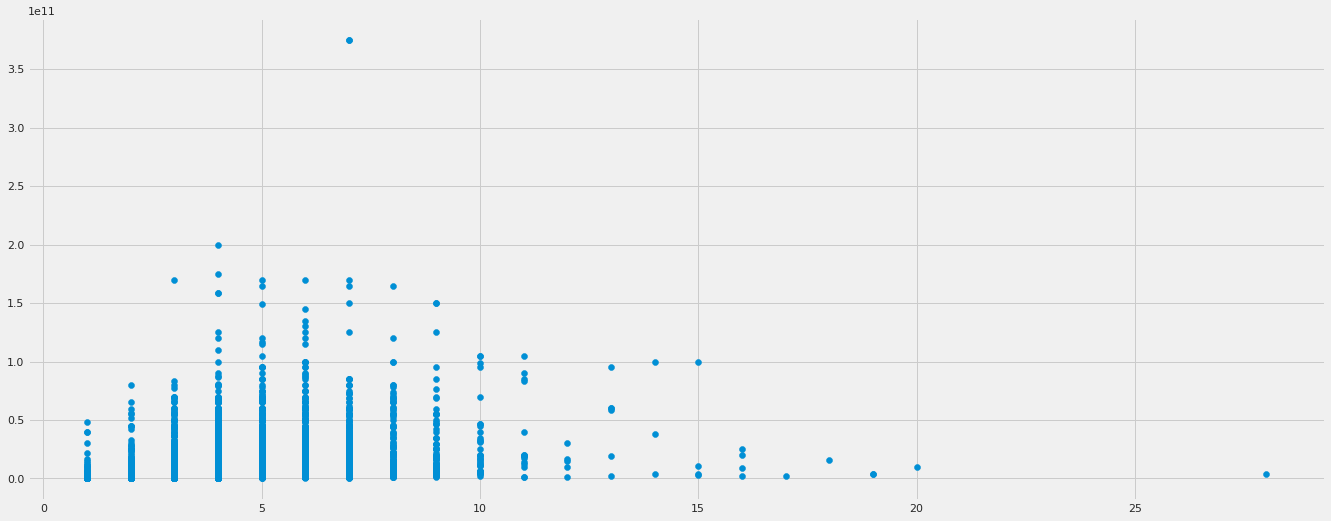

kamar_tidur


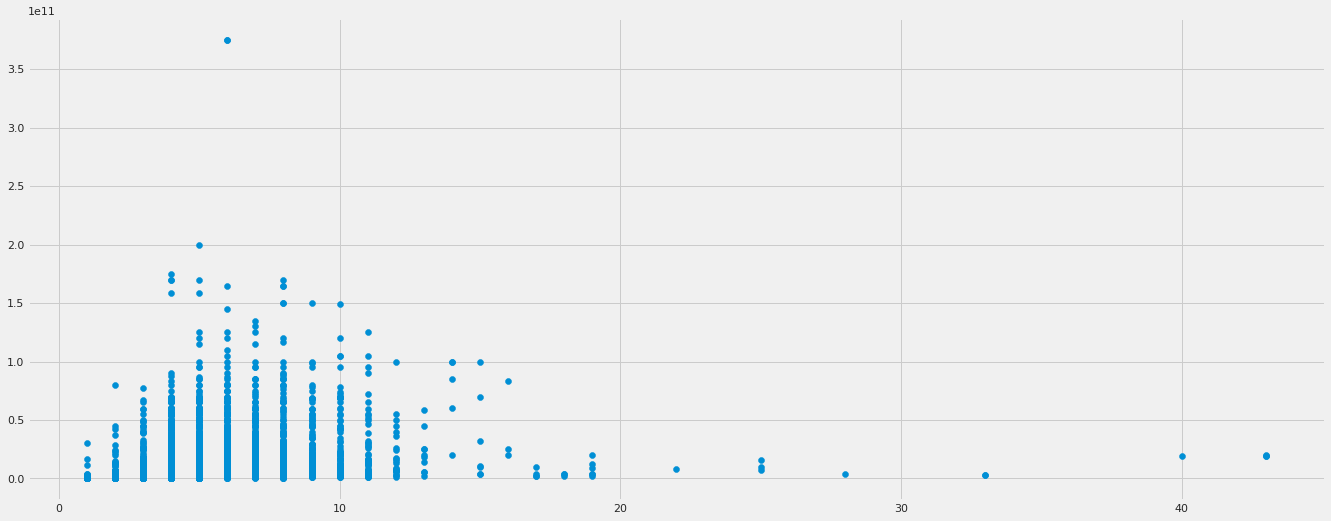

luas_bangunan


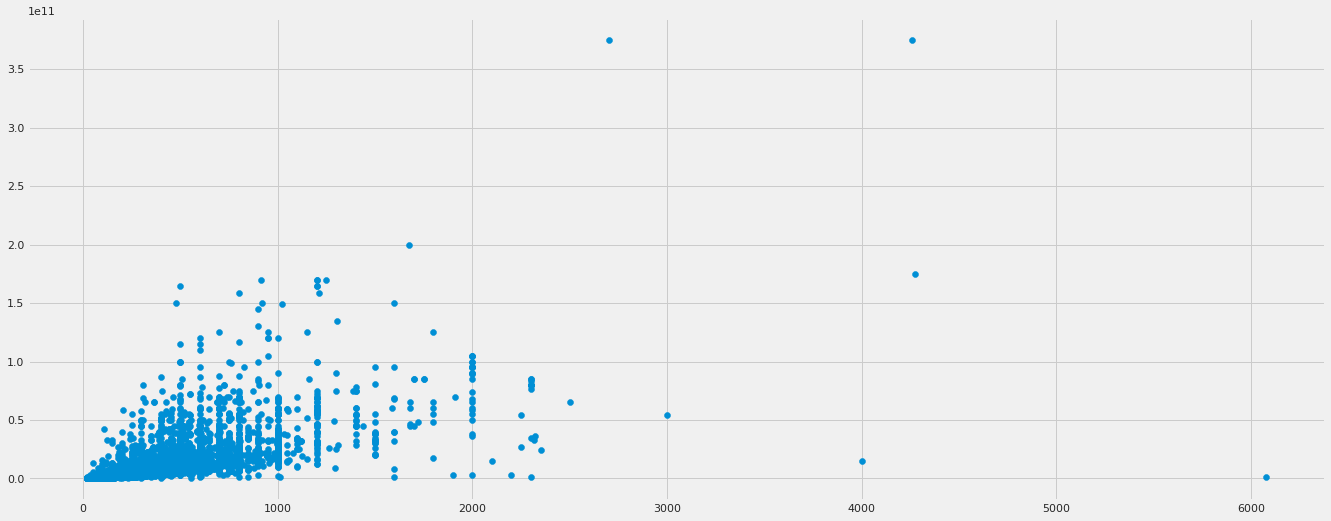

luas_tanah


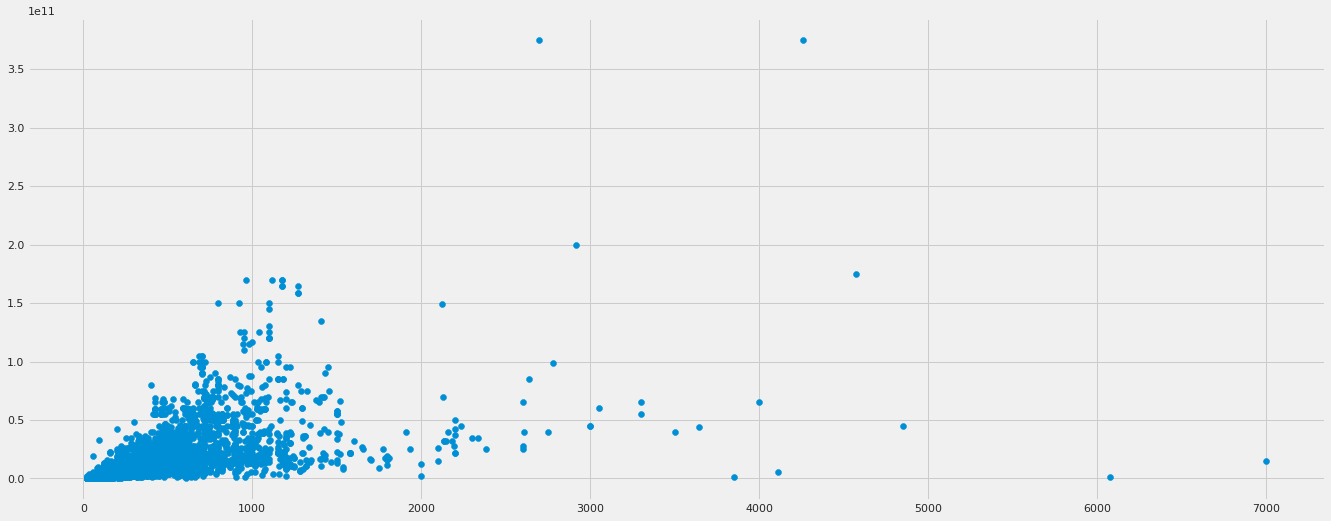

listrik


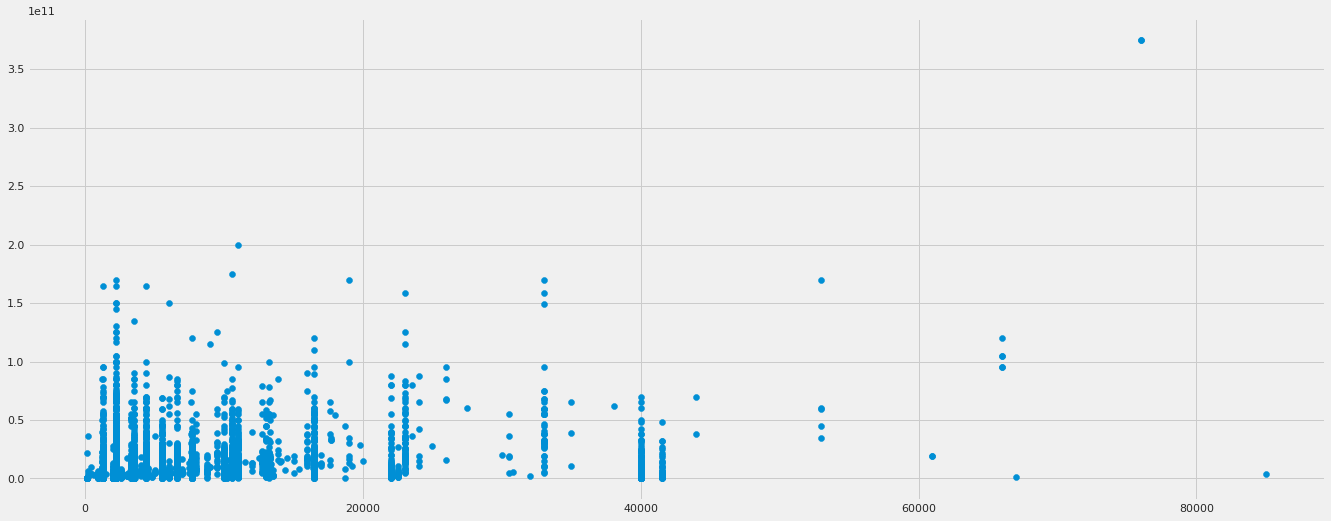

jumlah_lantai


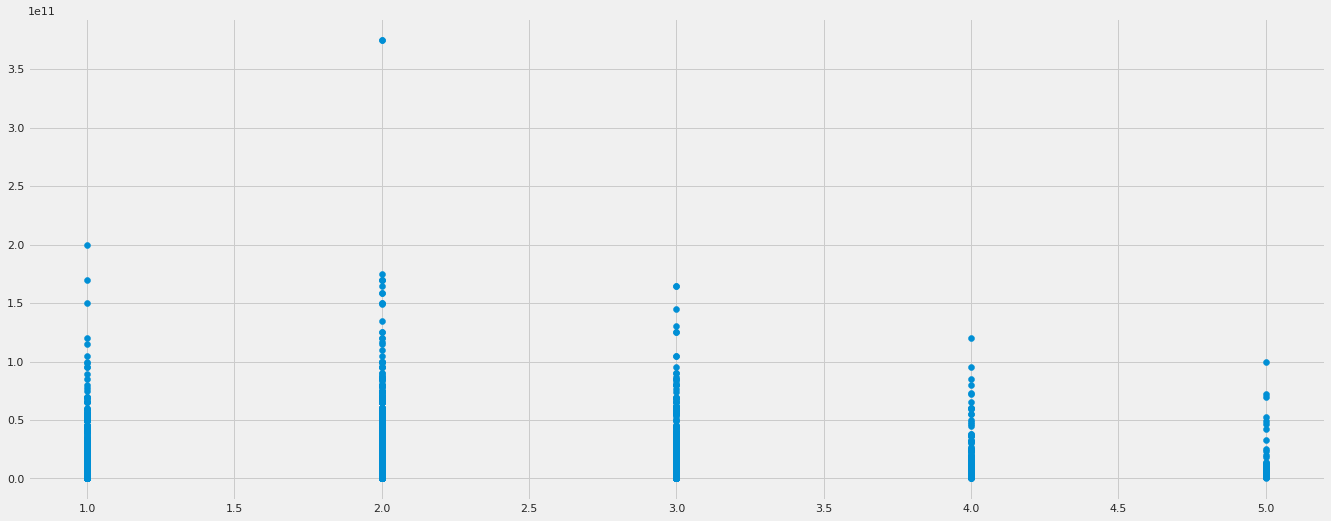

kecamatan


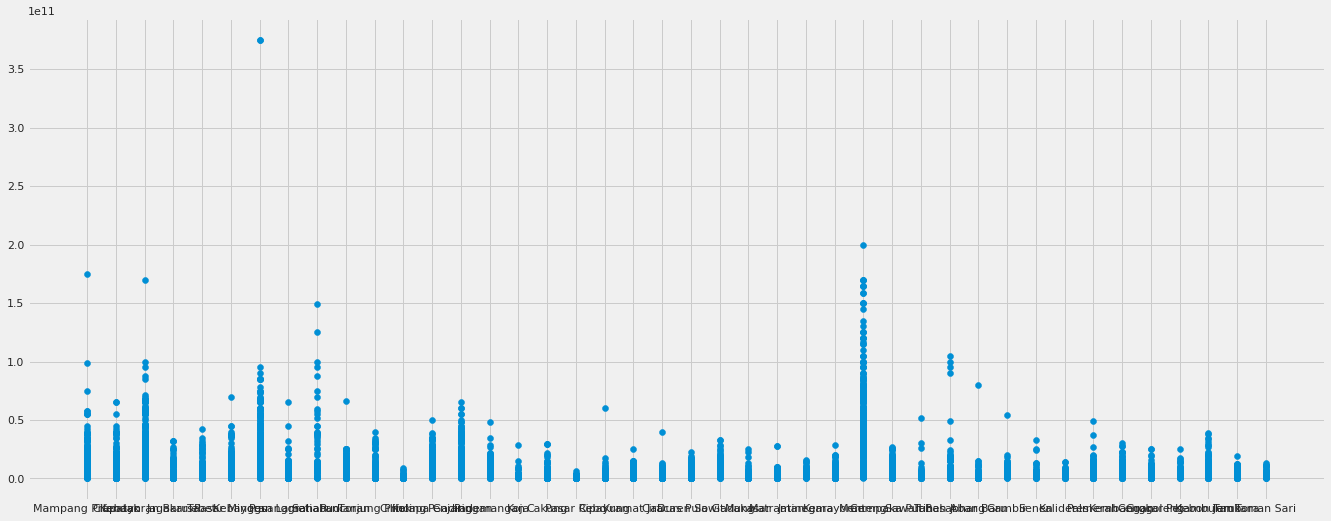

garasi


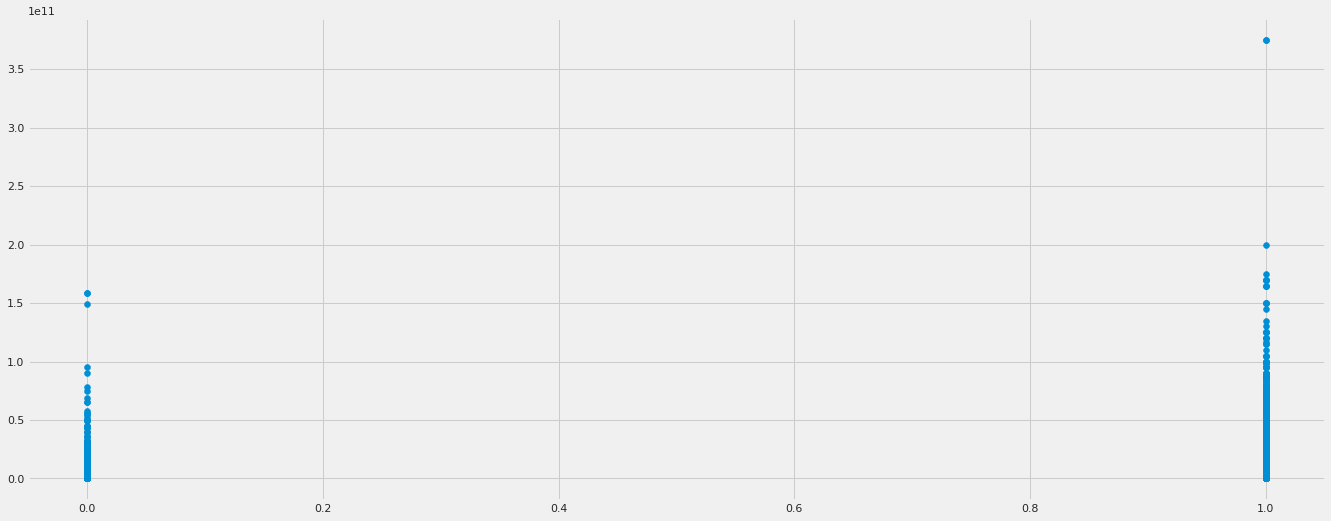

kolam_renang


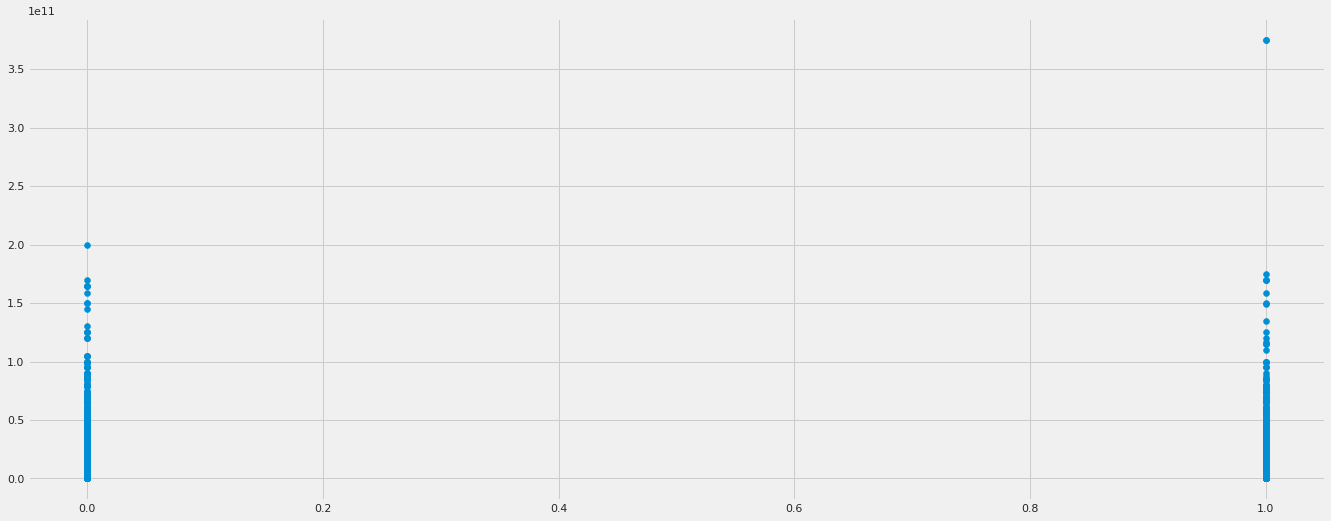

taman


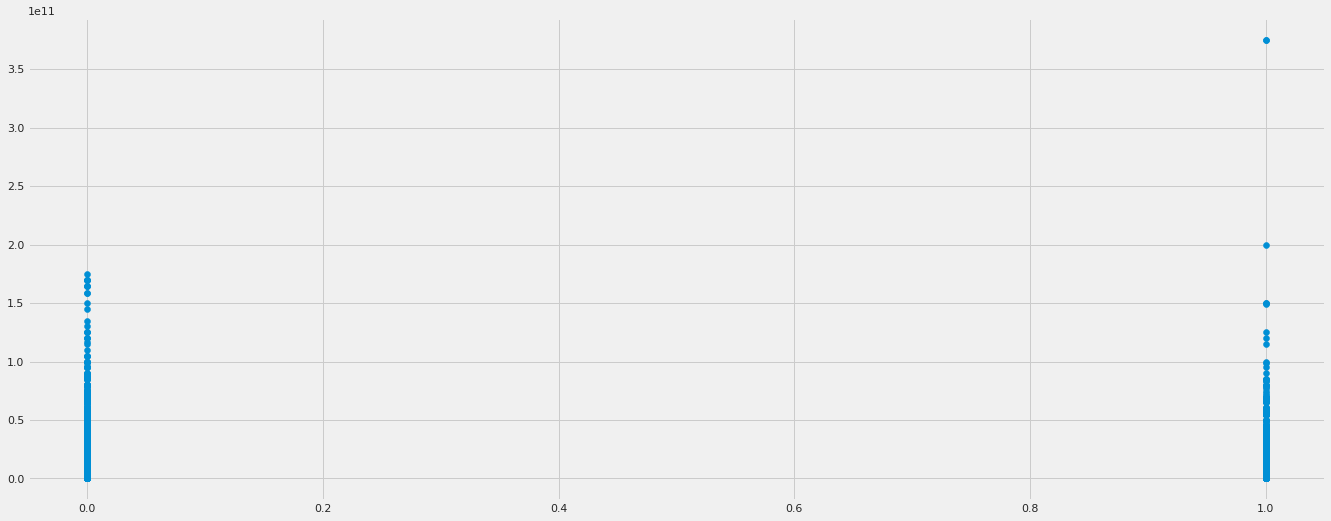

gym


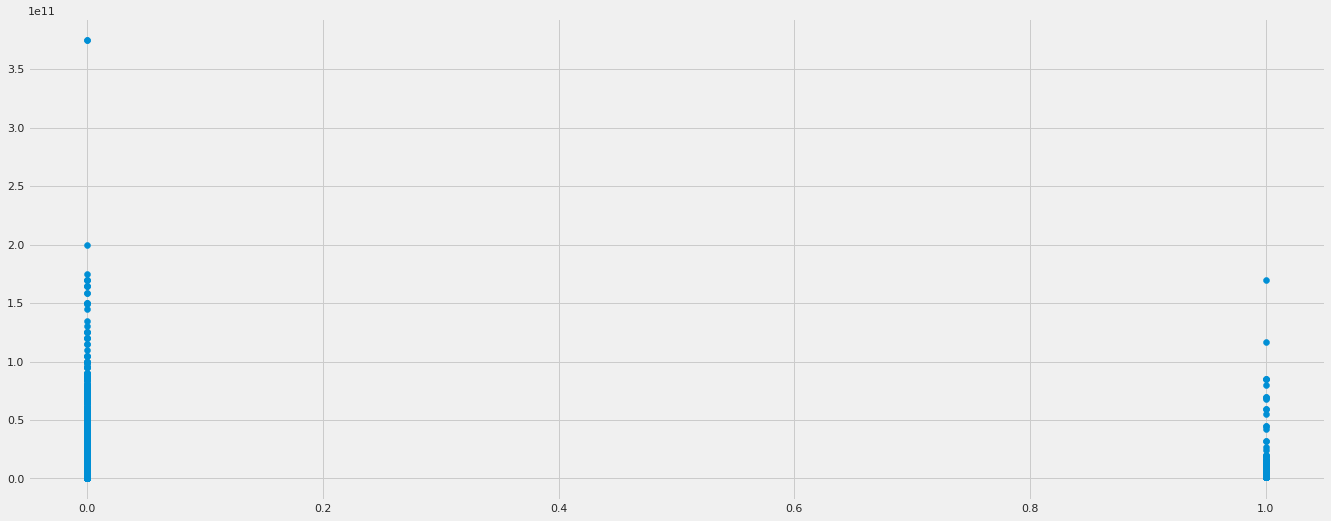

In [23]:
for i in num+cat:
    if i != 'harga':
        print(i)
        plt.scatter(df[i],df['harga'])
        plt.show()

kecamatan


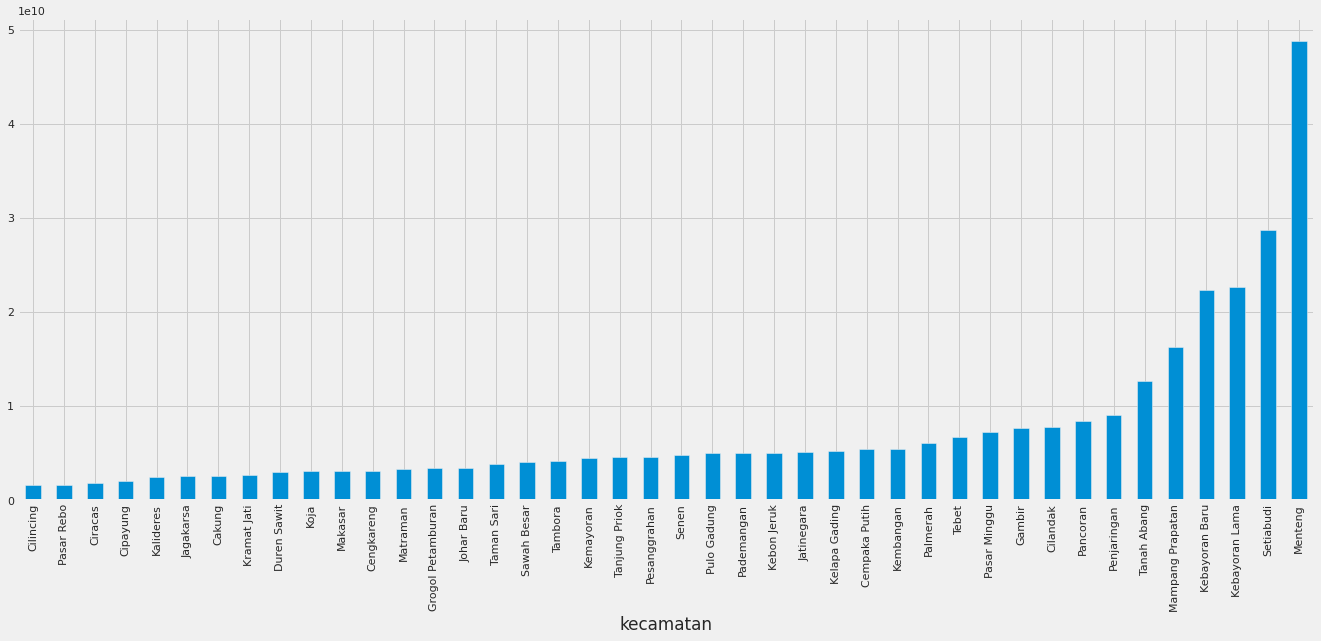

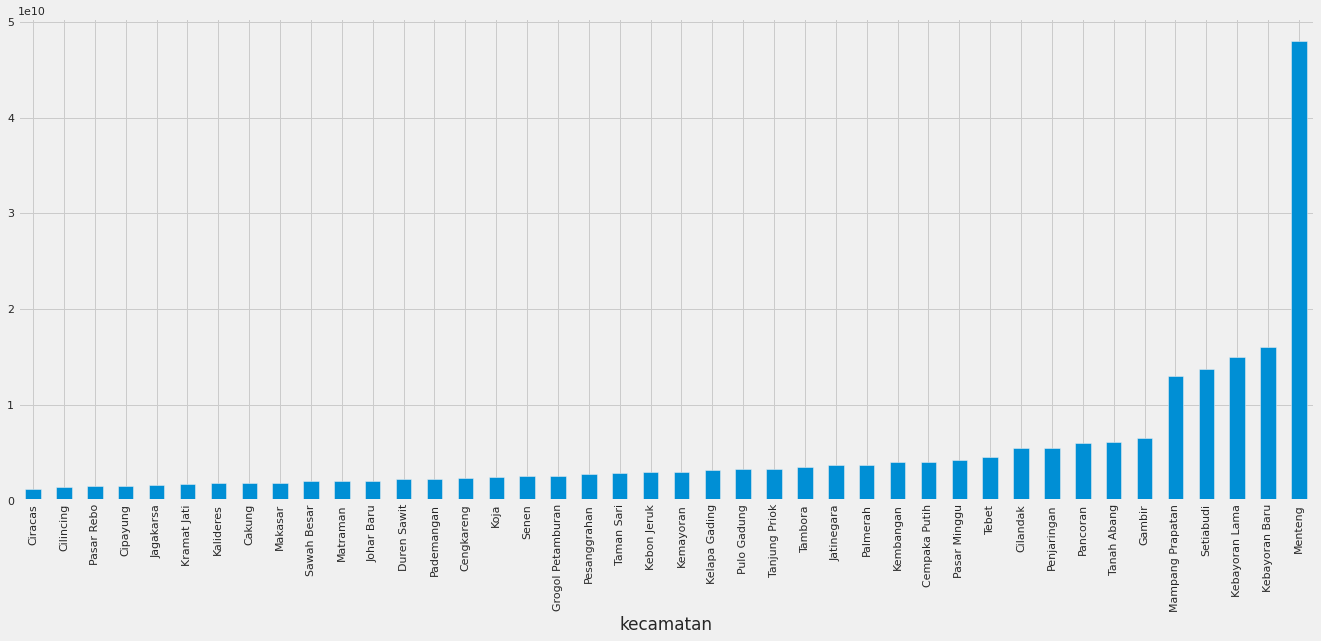

garasi


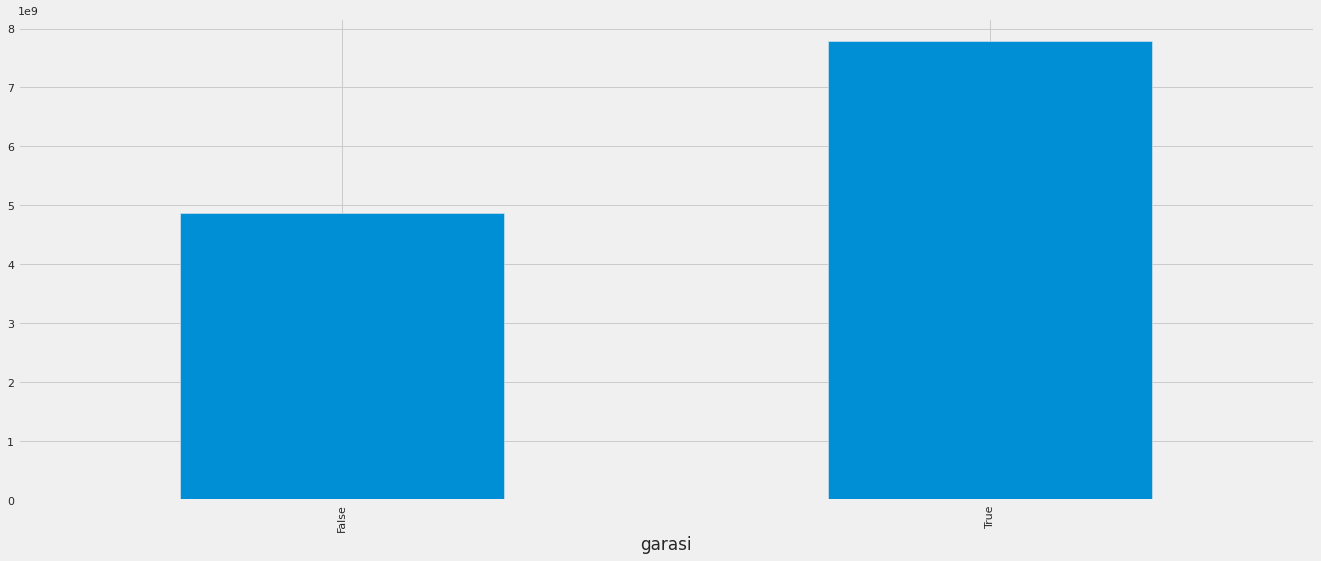

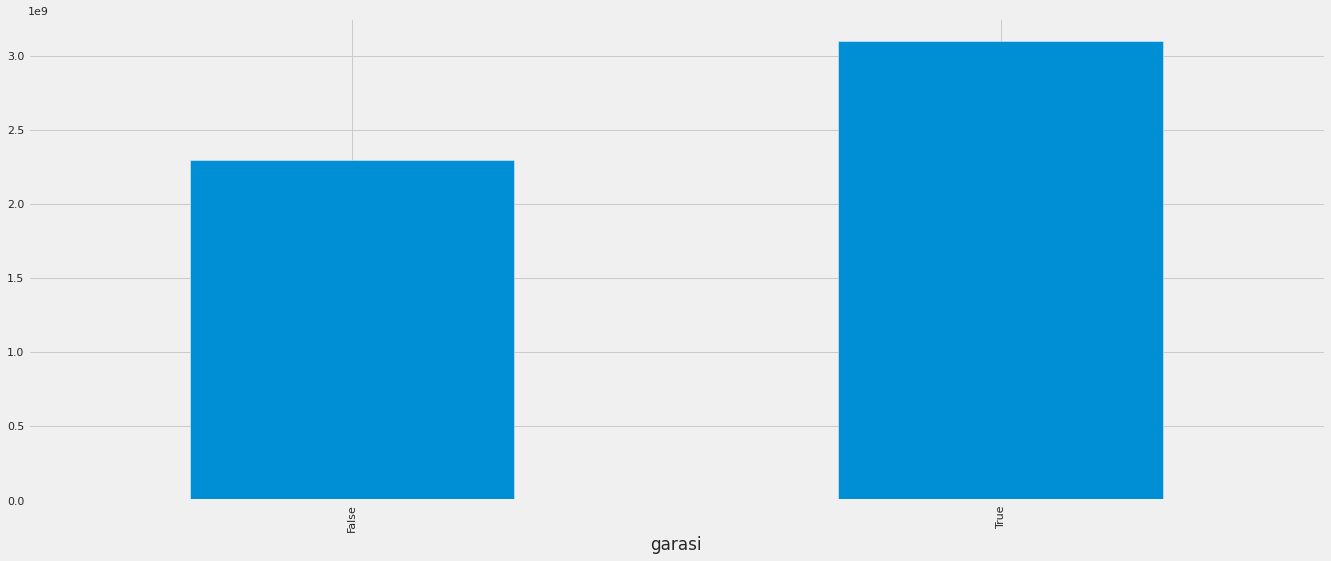

kolam_renang


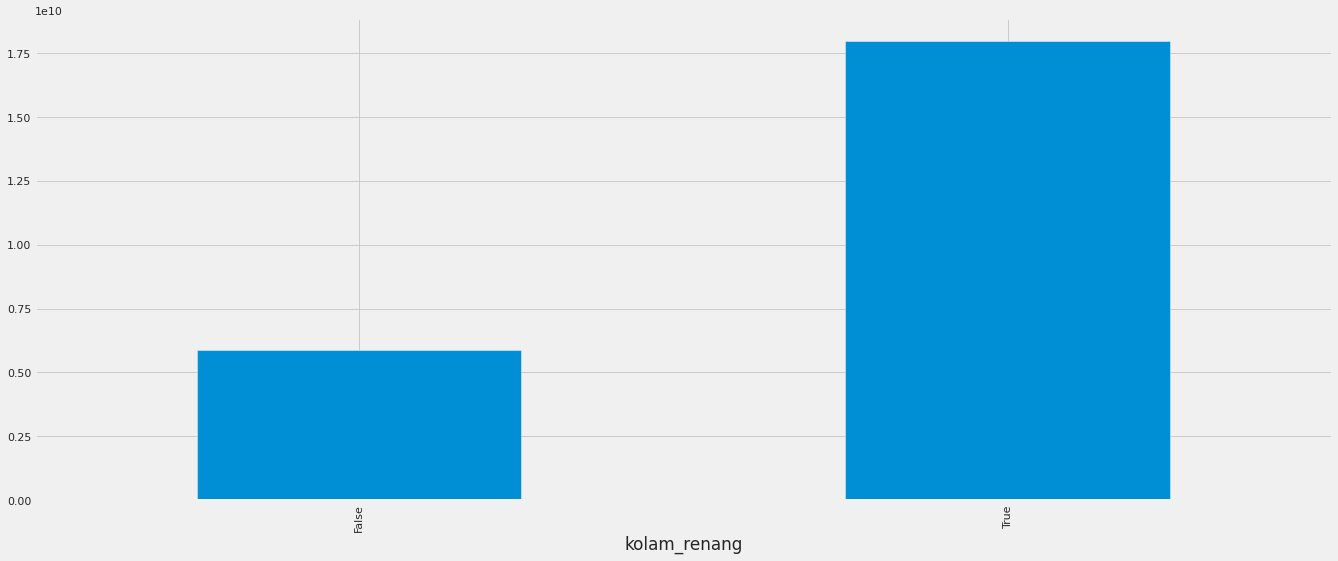

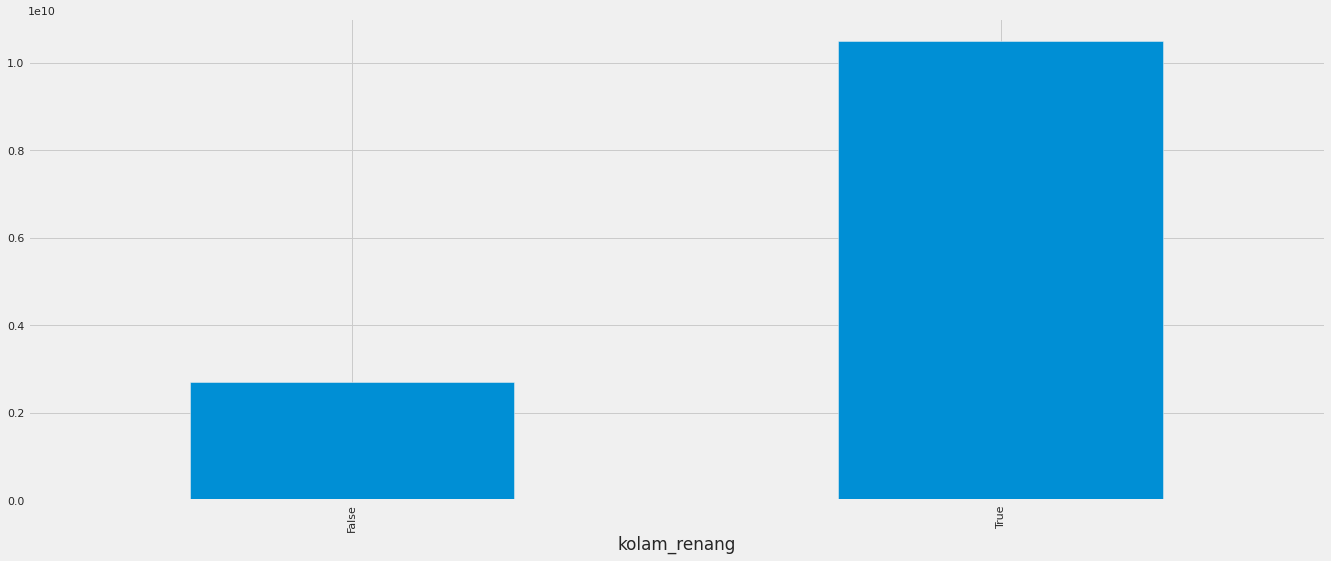

taman


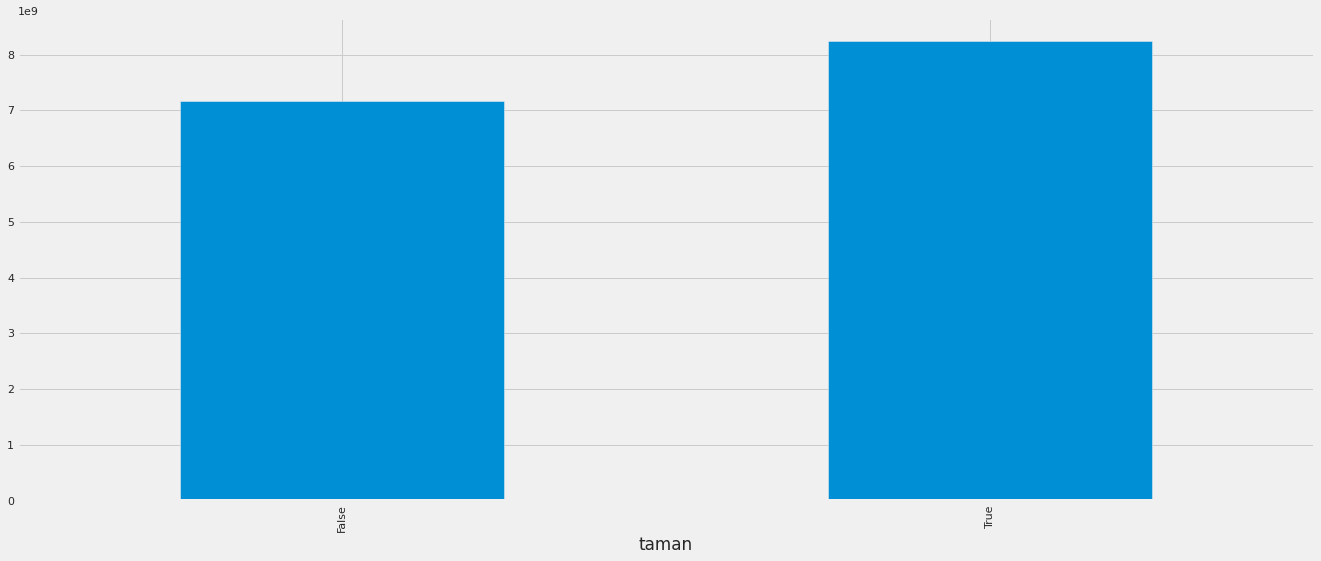

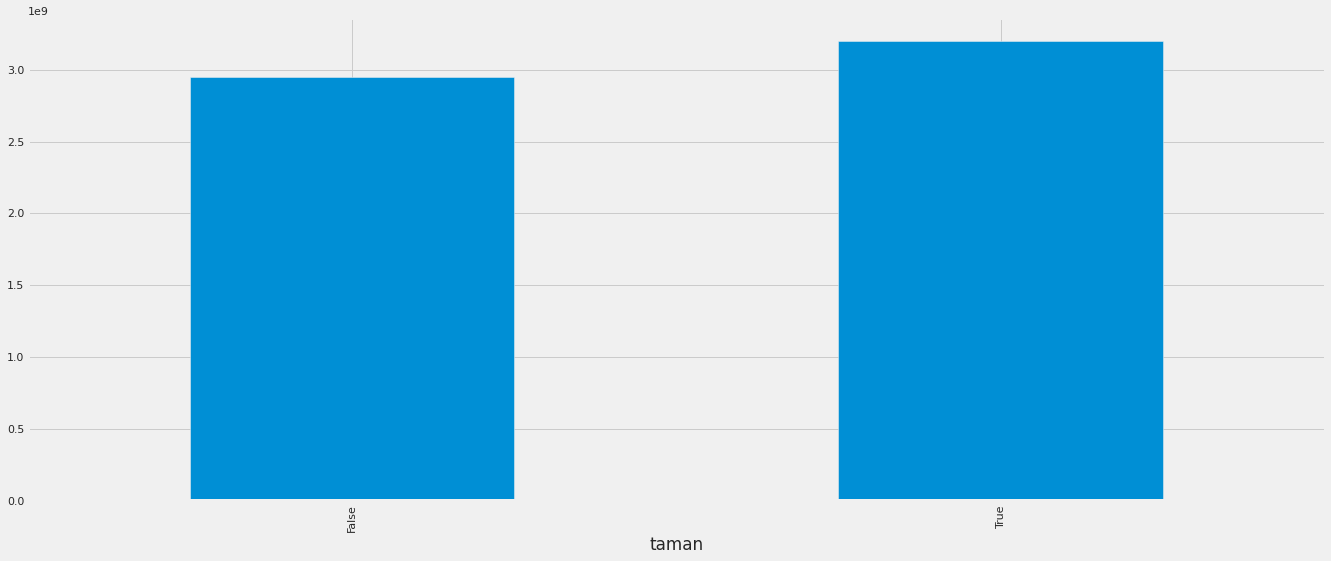

gym


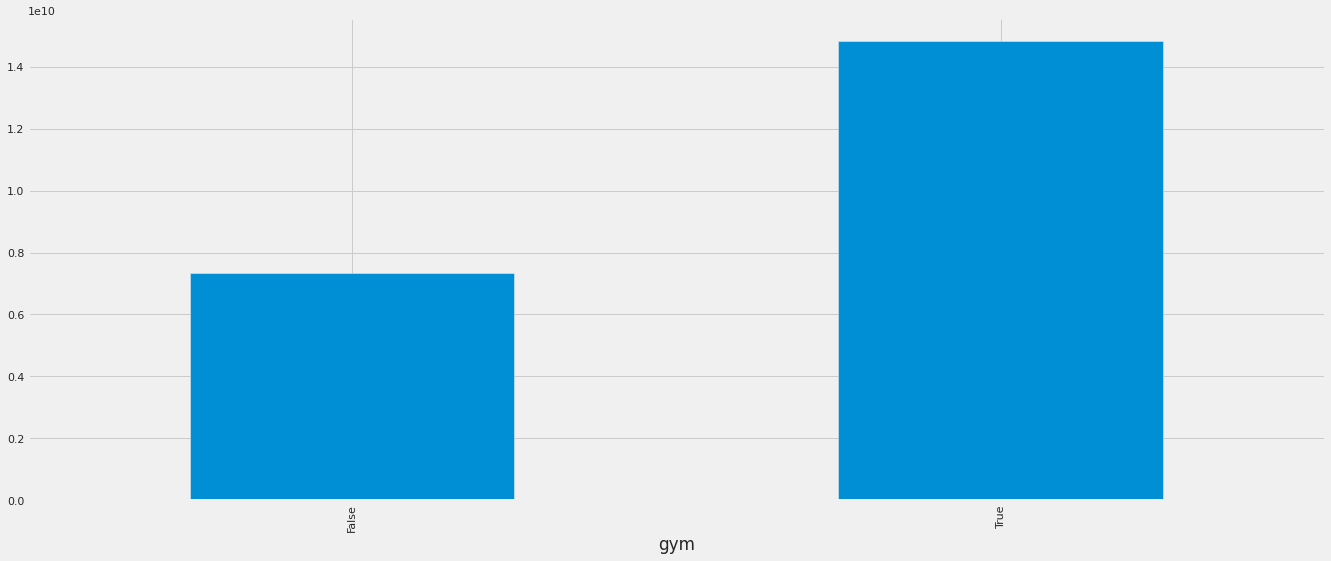

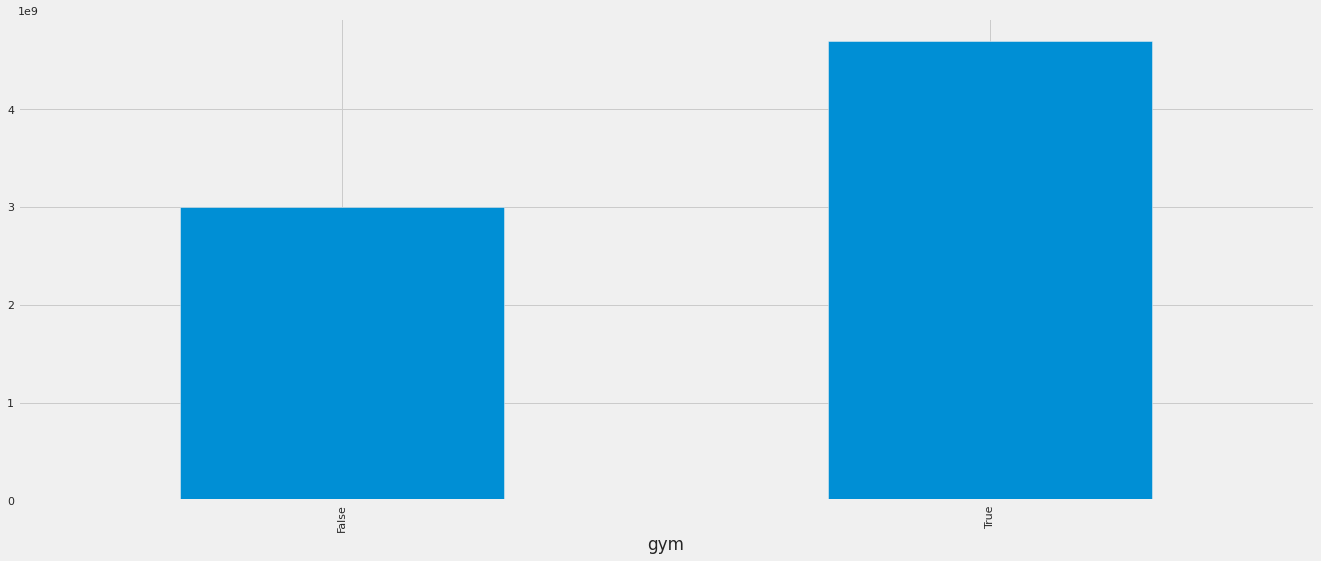

In [24]:
for i in cat:
    print(i)
    df.groupby(i)['harga'].mean().sort_values().plot.bar()
    plt.show()
    df.groupby(i)['harga'].median().sort_values().plot.bar()
    plt.show()

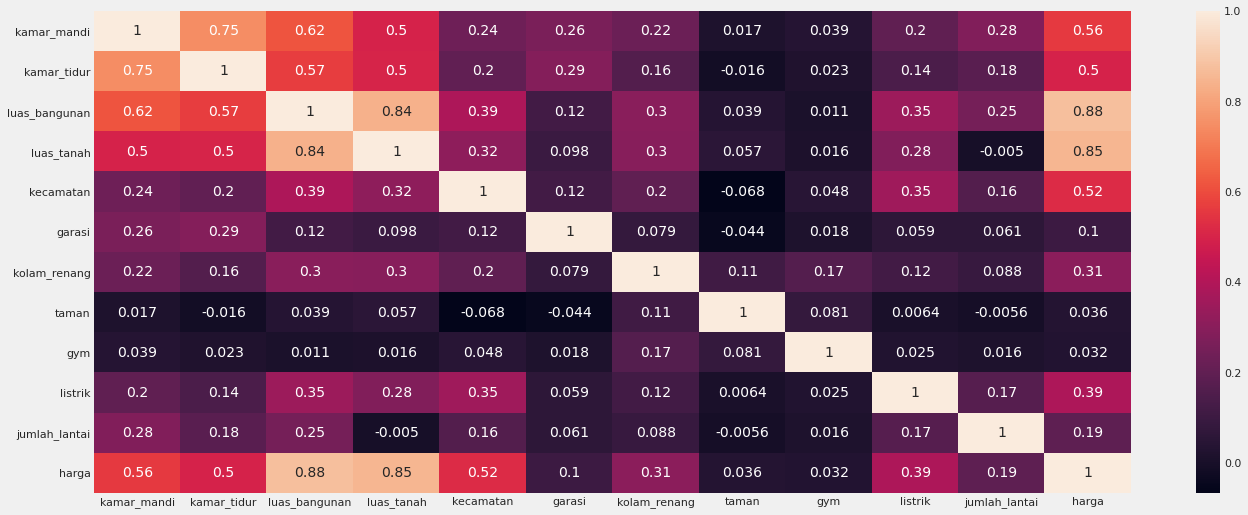

In [25]:
sns.heatmap(initial_data.corr(method = 'spearman'),annot=True)
plt.show()

In [59]:
df_experiment = df.copy()
df_experiment['kamar'] = df_experiment['kamar_mandi'] + df_experiment['kamar_tidur']
df_experiment['km:k'] = df_experiment['kamar_mandi'] / df_experiment['kamar']
df_experiment['lb:lt'] =  df_experiment['luas_bangunan'] / df_experiment['luas_tanah']
df_experiment = df_experiment.drop(
    ['kamar_mandi','luas_bangunan','garasi','kamar_tidur','taman','jumlah_lantai'], 
    axis = 1
)

In [60]:
df_experiment.describe()

,luas_tanah,harga,listrik,kamar,km:k,lb:lt
count,12765.000000,1.276500e+04,12765.000000,12765.000000,12765.000000,12765.000000
mean,237.327458,7.410743e+09,5828.903016,8.540384,0.445358,1.347801
std,288.504308,1.430444e+10,8482.236554,3.233090,0.064933,0.642073
min,22.000000,9.500000e+07,130.000000,2.000000,0.038462,0.025974
25%,90.000000,1.650000e+09,2200.000000,7.000000,0.400000,0.912698
50%,144.000000,3.000000e+09,2200.000000,8.000000,0.444444,1.280000
75%,263.000000,6.600000e+09,5500.000000,10.000000,0.500000,1.666667
max,7000.000000,3.750000e+11,85000.000000,56.000000,0.833333,21.100917


In [61]:
cat = [i for i in df_experiment.columns if df_experiment[i].dtypes =='O']

In [62]:
encode = DTE(variables = ['kecamatan'])
encode.fit(df_experiment,df_experiment['harga'])

DecisionTreeEncoder(param_grid={'max_depth': [1, 2, 3, 4]},
                    variables=['kecamatan'])

In [63]:
oe = OE(variables = [i for i in cat if i != 'kecamatan'])
oe.fit(df_experiment,df_experiment['harga'])

OrdinalEncoder(variables=['kolam_renang', 'gym'])

In [64]:
x = oe.transform(encode.transform(df_experiment))

In [65]:
x_scale = ss()
x_scale.fit(x.drop('harga',axis = 1))
y_scale = ss()
y_scale.fit(x[['harga']])

StandardScaler()

In [66]:
x = x_scale.transform(x.drop(['harga'],axis = 1))
y = y_scale.transform(df_experiment[['harga']])
x = pd.DataFrame(x)
y = pd.DataFrame(y)
x.columns = df_experiment.drop('harga', axis = 1).columns
y.columns = ['harga']
initial_data = pd.concat([x,y],axis = 1)
x = sm.add_constant(x)

In [67]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  harga   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     2705.
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        12:36:10   Log-Likelihood:                -11781.
No. Observations:               12765   AIC:                         2.358e+04
Df Residuals:                   12756   BIC:                         2.365e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.581e-17      0.005  -1.41e-14      1.000      -0.011       0.011
luas_tanah       0.4826      0.007     71.636      0.000       0.469       0.496
kecamatan        0.4447      0.006     76.631      0.000       0.433       0.456
kolam_renang     0.0391      0.006      6.734      0.000       0.028       0.050
gym              0.0133      0.005      2.425      0.015       0.003       0.024
listrik          0.0565      0.006     10.183      0.000       0.046       0.067
kamar            0.0345      0.006      5.668      0.000       0.023       0.046
km:k             0.0209      0.006      3.747      0.000       0.010       0.032
lb:lt            0.0643      0.006     10.886      0.000       0.053       0.076
==============================================================================
Omnibus:                    16425.285   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21049051.400
Skew:                           6.387   Prob(JB):                         0.00
Kurtosis:                     201.525   Cond. No.                         2.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

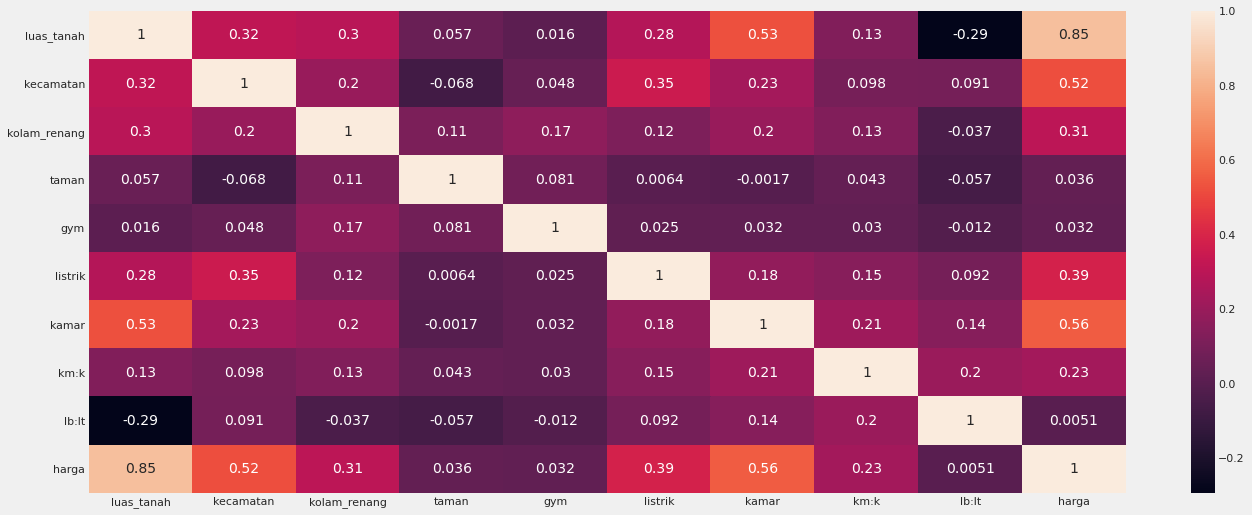

In [57]:
sns.heatmap(initial_data.corr(method = 'spearman'),annot=True)
plt.show()

In [58]:
pd.DataFrame(model.params).reset_index().sort_values(by = 0, ascending = False)

,index,0
1,luas_tanah,4.823326e-01
2,kecamatan,4.449880e-01
9,lb:lt,6.461137e-02
6,listrik,5.674712e-02
3,kolam_renang,3.840834e-02
7,kamar,3.471579e-02
8,km:k,2.054921e-02
5,gym,1.281518e-02
4,taman,7.120164e-03
0,const,-7.580772e-17
